In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [3]:
df = pd.read_csv('employee_burnout.csv')

In [4]:
print(df.isnull().sum())

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64


In [44]:
print(df.shape)

(22750, 7)


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Designation           22750 non-null  int64  
 1   Resource Allocation   22750 non-null  float64
 2   Mental Fatigue Score  22750 non-null  float64
 3   Burn Rate             22750 non-null  float64
 4   Tenure_years          22750 non-null  float64
 5   Company Type_Service  22750 non-null  int32  
 6   Burnout_Level         22750 non-null  int64  
dtypes: float64(4), int32(1), int64(2)
memory usage: 1.1 MB


In [46]:
df.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Tenure_years,Company Type_Service,Burnout_Level
count,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000
mean,2.178725,4.452176,5.744176,0.451906,174.739042,0.652000,0.096615
std,1.135145,1.987427,1.829962,0.193268,2.926339,0.476346,0.295440
min,0.000000,1.000000,0.000000,0.000000,169.666667,0.000000,0.000000
25%,1.000000,3.000000,4.700000,0.320000,172.222222,0.000000,0.000000
50%,2.000000,4.000000,5.900000,0.450000,174.722222,1.000000,0.000000
75%,3.000000,6.000000,6.900000,0.580000,177.277778,1.000000,0.000000
max,5.000000,10.000000,10.000000,1.000000,179.805556,1.000000,1.000000


In [47]:
df.isnull().sum()

Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
Tenure_years            0
Company Type_Service    0
Burnout_Level           0
dtype: int64

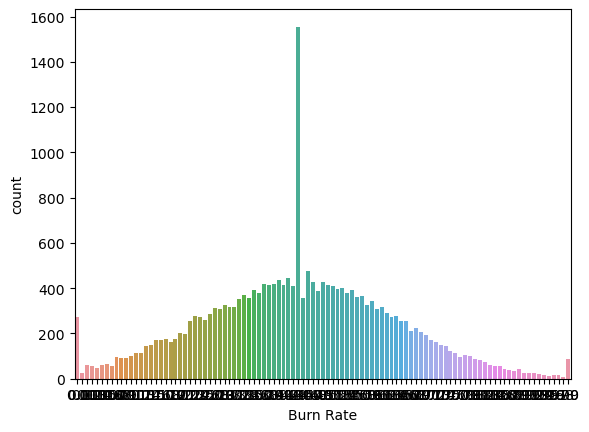

In [48]:
sns.countplot(x='Burn Rate', data=df)  # check class distribution
plt.show()

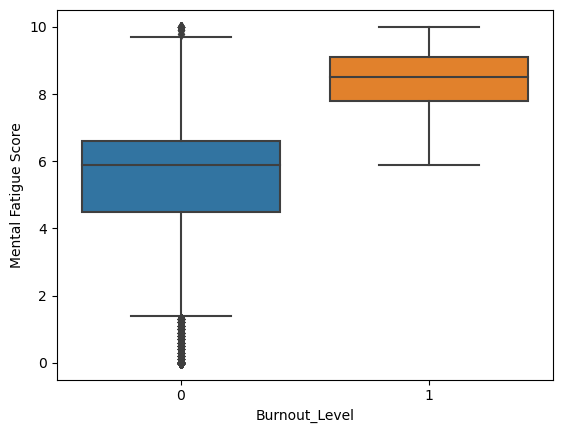

In [51]:
sns.boxplot(x='Burnout_Level', y='Mental Fatigue Score', data=df)
plt.show()

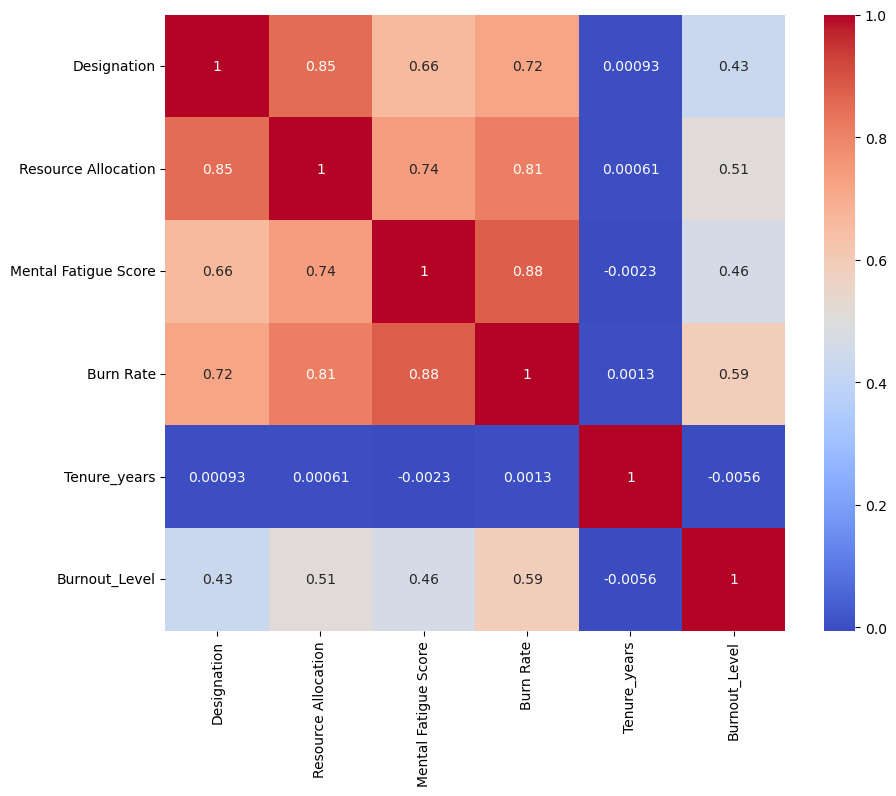

In [52]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])


corr = numeric_df.corr()


plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [5]:
num_cols = ['Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']
cat_cols = ['Gender', 'Company Type', 'WFH Setup Available', 'Designation']

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [6]:
df['Date of Joining'] = pd.to_datetime(df['Date of Joining'])
df['Tenure_days'] = (pd.to_datetime('today') - df['Date of Joining']).dt.days
df['Tenure_years'] = df['Tenure_days'] / 36

C:\Users\HP X360 830 G6\AppData\Local\Temp\ipykernel_7408\3323444571.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date of Joining'] = pd.to_datetime(df['Date of Joining'])


In [7]:
df.drop(['Date of Joining', 'Tenure_days'], axis=1, inplace=True)


In [8]:
df = pd.get_dummies(df, columns=['Company Type'], drop_first=True)

In [9]:
threshold = 0.7
df['Burnout_Level'] = df['Burn Rate'].apply(lambda x: 1 if x > threshold else 0)


In [10]:
X = df.drop(['Burn Rate', 'Burnout_Level'], axis=1)
y = df['Burnout_Level']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
num_cols_scaled = ['Resource Allocation', 'Mental Fatigue Score']  # exclude Burn Rate
scaler = StandardScaler()
X_train[num_cols_scaled] = scaler.fit_transform(X_train[num_cols_scaled])
X_test[num_cols_scaled] = scaler.transform(X_test[num_cols_scaled])


In [13]:
print('Go on..')

Go on..


In [14]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0, 'Other': 2})
df['WFH Setup Available'] = df['WFH Setup Available'].map({'Yes': 1, 'No': 0})
df['WFH Setup Available'].fillna(0, inplace=True)  # assume 0 if missing

In [15]:
print('You can..')

You can..


In [16]:
print(df.dtypes)
print(df.head())


Employee ID              object
Gender                  float64
WFH Setup Available       int64
Designation               int64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
Tenure_years            float64
Company Type_Service       bool
Burnout_Level             int64
dtype: object
                Employee ID  Gender  WFH Setup Available  Designation  \
0  fffe32003000360033003200     NaN                    0            2   
1      fffe3700360033003500     NaN                    1            1   
2  fffe31003300320037003900     NaN                    1            2   
3  fffe32003400380032003900     NaN                    1            1   
4  fffe31003900340031003600     NaN                    0            3   

   Resource Allocation  Mental Fatigue Score  Burn Rate  Tenure_years  \
0                  3.0                   3.8       0.16    172.222222   
1                  2.0                   5.0       0.36    170.527778   
2       

In [17]:
df['Company Type_Service'] = df['Company Type_Service'].astype(int)
print(df.dtypes)
print(df.head())

Employee ID              object
Gender                  float64
WFH Setup Available       int64
Designation               int64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
Tenure_years            float64
Company Type_Service      int32
Burnout_Level             int64
dtype: object
                Employee ID  Gender  WFH Setup Available  Designation  \
0  fffe32003000360033003200     NaN                    0            2   
1      fffe3700360033003500     NaN                    1            1   
2  fffe31003300320037003900     NaN                    1            2   
3  fffe32003400380032003900     NaN                    1            1   
4  fffe31003900340031003600     NaN                    0            3   

   Resource Allocation  Mental Fatigue Score  Burn Rate  Tenure_years  \
0                  3.0                   3.8       0.16    172.222222   
1                  2.0                   5.0       0.36    170.527778   
2       

In [18]:
df = df.drop('Employee ID', axis = 1)
df = df.drop('Gender', axis = 1)
df = df.drop('WFH Setup Available', axis =1)

In [22]:
print('Dont Repart the mistakes')

Dont Repart the mistakes


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.preprocessing import StandardScaler

num_cols = [  'Designation', 
            'Resource Allocation', 'Mental Fatigue Score', 'Tenure_years', 
            'Company Type_Service']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [25]:
print(df.dtypes)


Designation               int64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
Tenure_years            float64
Company Type_Service      int32
Burnout_Level             int64
dtype: object


In [26]:
df.head()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Tenure_years,Company Type_Service,Burnout_Level
0,2,3.0,3.8,0.16,172.222222,1,0
1,1,2.0,5.0,0.36,170.527778,1,0
2,2,4.0,5.8,0.49,177.888889,0,0
3,1,1.0,2.6,0.20,171.277778,1,0
4,3,7.0,6.9,0.52,174.111111,1,0


In [27]:
# Check object columns
print(X_train.select_dtypes(include='object').columns)

# Or see which values are non-numeric
for col in X_train.columns:
    if not pd.api.types.is_numeric_dtype(X_train[col]):
        print(col, X_train[col].unique()[:10])


Index(['Employee ID', 'Gender', 'WFH Setup Available'], dtype='object')
Employee ID ['fffe390036003900' 'fffe3800350038003600' 'fffe33003300300036003600'
 'fffe3500380031003700' 'fffe340032003900' 'fffe31003600380032003000'
 'fffe32003700340031003600' 'fffe32003300380033003900'
 'fffe31003600340032003000' 'fffe3400300034003100']
Gender ['Female' 'Male']
WFH Setup Available ['Yes' 'No']


In [28]:
df.head()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Tenure_years,Company Type_Service,Burnout_Level
0,2,3.0,3.8,0.16,172.222222,1,0
1,1,2.0,5.0,0.36,170.527778,1,0
2,2,4.0,5.8,0.49,177.888889,0,0
3,1,1.0,2.6,0.20,171.277778,1,0
4,3,7.0,6.9,0.52,174.111111,1,0


In [29]:
X_train = X_train.drop(['Employee ID'], axis=1, errors='ignore')
X_test = X_test.drop(['Employee ID'], axis=1, errors='ignore')


In [30]:
cat_cols = X_train.select_dtypes(include='object').columns
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

# Align train and test
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [31]:
from sklearn.preprocessing import StandardScaler

num_cols = X_train.columns  # now all numeric
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4141
           1       0.76      0.67      0.71       409

    accuracy                           0.95      4550
   macro avg       0.86      0.83      0.84      4550
weighted avg       0.95      0.95      0.95      4550



In [33]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)  # Train the model


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [34]:
y_pred = lr.predict(X_test)


In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9514285714285714

Confusion Matrix:
 [[4054   87]
 [ 134  275]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      4141
           1       0.76      0.67      0.71       409

    accuracy                           0.95      4550
   macro avg       0.86      0.83      0.84      4550
weighted avg       0.95      0.95      0.95      4550



In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9520879120879121
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4141
           1       0.73      0.73      0.73       409

    accuracy                           0.95      4550
   macro avg       0.85      0.85      0.85      4550
weighted avg       0.95      0.95      0.95      4550



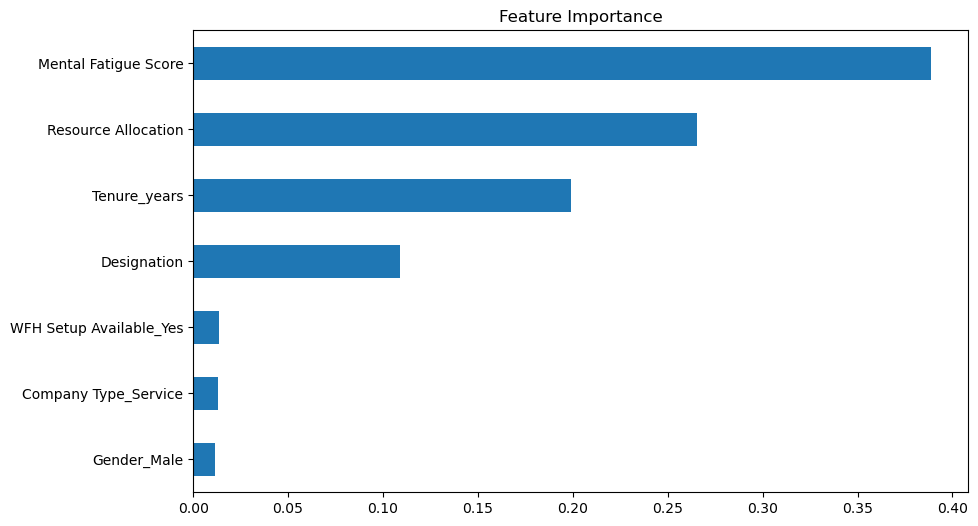

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importance.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance")
plt.show()


In [38]:
import joblib

joblib.dump(lr, "employee_burnout_model.pkl")


['employee_burnout_model.pkl']

In [40]:
model = joblib.load("employee_burnout_model.pkl")
X_new = X_test.iloc[0:1]  # Select one sample from test set
model.predict(X_new)




array([0], dtype=int64)

In [43]:
print('Successful')

Successful
